In [1]:
import numpy as np
import random
from scipy.special import comb
import math

In [2]:
def genBernoullis(size):
    return np.random.uniform(0, 1, size)

In [18]:
n = 8
num_samples = 100

In [19]:
# for num_sample number of times 
# 10 choose 3 cycles 
# find max

In [20]:
# generate one graph 
vals = []
for i in range(1, n):
    len_cycles = int(comb(n, i))*math.factorial(i-1)
    
    
    print(i)
    mean_sum = 0
    for j in range(0, num_samples):        
        max_val = -1        
        for k in range(0, len_cycles):
            sample = genBernoullis(i) 
            sample_avg = np.mean(sample)
            max_val = max(max_val, sample_avg)
        mean_sum = max_val + mean_sum
    
#     print("Cycle length " + str(i))
    vals.append(mean_sum/num_samples)

1
2
3
4
5
6
7


In [21]:
import matplotlib.pyplot as plt 

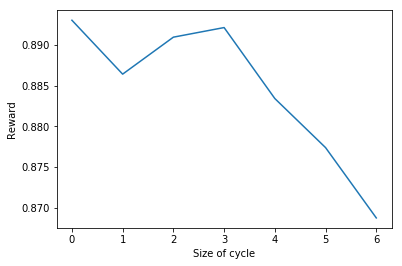

In [22]:
plt.plot(vals)
plt.ylabel('Reward')
plt.xlabel('Size of cycle')
plt.legend()
plt.show()

In [25]:
np.random.uniform(0, 1, (10, 10))

array([[ 0.36743027,  0.75103017,  0.73096329,  0.38910533,  0.34150043,
         0.07340008,  0.97516403,  0.0317966 ,  0.19100866,  0.0722592 ],
       [ 0.2694386 ,  0.28484465,  0.19085593,  0.94124786,  0.13578381,
         0.51738616,  0.68220547,  0.91078369,  0.3017965 ,  0.38574401],
       [ 0.15983671,  0.181782  ,  0.41154287,  0.25164132,  0.34960949,
         0.04283918,  0.76257513,  0.40845548,  0.71714821,  0.93493516],
       [ 0.59057017,  0.5552513 ,  0.28011476,  0.82817411,  0.41480407,
         0.22194635,  0.07606219,  0.6705661 ,  0.36151698,  0.56483302],
       [ 0.28315811,  0.48050613,  0.51943769,  0.51011241,  0.72558532,
         0.55711737,  0.86640213,  0.72389781,  0.20756966,  0.3863621 ],
       [ 0.00333325,  0.63150705,  0.1721304 ,  0.11878172,  0.45879045,
         0.55468828,  0.63405555,  0.31589257,  0.08447659,  0.16778769],
       [ 0.4576217 ,  0.22533219,  0.44542503,  0.40772675,  0.98198804,
         0.05221978,  0.09452565,  0.5646819 

In [219]:
def getReward(vertices, matrix):
    reward = 0.0
    for i in range(1, len(vertices)):
#         print(matrix[vertices[i-1], vertices[i]])
        reward += matrix[vertices[i-1], vertices[i]]
    
    return reward

In [233]:
def rewardTuples(path, n, arm_choices, matrix, end):
    if n <= 1:
#         print(path+[end])
        return getReward(path+[end], matrix)
    else:
        max_val  = -1 
        for i in range(0, arm_choices):
            temp = rewardTuples(path+[i], n-1, arm_choices, matrix, end)
            if temp > max_val:
                max_val = temp
        
        return max_val 

In [234]:
n = 7
max_vals = [0.0 for i in range(0, n)] ## store the averages
num_samples = 50
# outer loop loops over "sampled random graphs" 
for i in range(0, num_samples):    
        
    # payoff matrix
    matrix = np.random.uniform(0, 1, (n, n))
    
    # for every possible starting point k
    # generate tuple of for (k,....,k), no restrictions on value since complete graph
    # traverse the adjacency to get weights 
    for j in range(1, n):
        ## iterate through
        temp_max = -1
        for start in range(1, n):
            # j-1 because fix the first and last element of the tuple
            reward = rewardTuples([start], j, n, matrix, start)
            if reward > temp_max:
                temp_max = reward   
        max_vals[j] += (temp_max/(j)) 


In [236]:
avgs = [elem/num_samples for elem in max_vals]
avgs = avgs[1:]

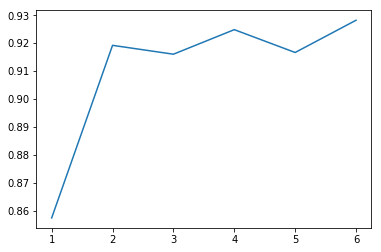

In [237]:
plt.plot(range(1, len(avgs)+1), avgs)
plt.show()